<a href="https://colab.research.google.com/github/OmarAlsaqa/DDS/blob/master/DDS_99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import cv2
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/DDS/Copy of imgs.zip'

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/DDS/Copy of driver_imgs_list.csv.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/DDS/Copy of driver_imgs_list.csv.zip
  inflating: driver_imgs_list.csv    


In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df=pd.read_csv('/content/driver_imgs_list.csv')

In [0]:
from __future__ import print_function
from __future__ import absolute_import
from __future__ import division

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import sys
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

import itertools

import keras
from keras import utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers.normalization import BatchNormalization
#from keras.layers import *
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import activations
from keras.regularizers import l2
from keras.engine.topology import get_source_inputs

import tensorflow

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
import cv2

from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
from keras import applications
from keras_applications.resnet_v2 import ResNet152V2

In [0]:
import time
from tqdm import tqdm
from IPython.display import FileLink
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
%matplotlib inline
from IPython.display import display, Image
import matplotlib.image as mpimg
import cv2

In [0]:
dataset = pd.read_csv('/content/driver_imgs_list.csv')
dataset.head(5)

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [0]:
train_gen = ImageDataGenerator(#rotation_range=3,
                               #width_shift_range=0.05,
                               #height_shift_range=0.02,
                               #shear_range=0.003,
                               #zoom_range=0.06,
                               #channel_shift_range=0.0,
                               #fill_mode='nearest',
                               #horizontal_flip=False, vertical_flip=False,
                               rescale=1.0/255.0,
                               validation_split=0.2)

train_gene = train_gen.flow_from_directory('/content/train',
                                          target_size=(64, 64),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=64, shuffle=False,
                                          subset='training',
                                          interpolation='nearest')

val_gene = train_gen.flow_from_directory('/content/train',
                                          target_size=(64, 64),
                                          color_mode='rgb',
                                          class_mode='categorical',
                                          batch_size=64, shuffle=False,
                                          subset='validation',
                                          interpolation='nearest')

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [0]:
model = Sequential()

## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.2))

## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.2))

## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
#model.add(Dropout(0.2))

## Output
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 62, 62, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
batch_normalization_27 (Batc (None, 31, 31, 64)       

In [0]:
# change the label_smoothing value (0.1 for example) and compare results  
def Loss_compute(y_true, y_pred, label_smoothing=0.1):
    loss = keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

In [0]:
opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss=Loss_compute, metrics=['accuracy'])

In [0]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.995):
            print("\nReached more than 99.5% validation accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [0]:
# Training the Vanilla Model
history = model.fit_generator(train_gene,
                              steps_per_epoch = train_gene.samples // 64,
                              validation_data = val_gene, 
                              validation_steps = val_gene.samples // 64,
                              epochs=50, verbose=1, callbacks = [callbacks])

Epoch 1/50
280/280 [==============================] - 105s 374ms/step - loss: 2.6219 - accuracy: 0.1993 - val_loss: 2.2861 - val_accuracy: 0.0893
Epoch 2/50
280/280 [==============================] - 104s 372ms/step - loss: 1.8359 - accuracy: 0.3728 - val_loss: 1.4980 - val_accuracy: 0.5492
Epoch 3/50
280/280 [==============================] - 104s 370ms/step - loss: 1.4457 - accuracy: 0.5724 - val_loss: 1.3840 - val_accuracy: 0.7100
Epoch 4/50
280/280 [==============================] - 104s 370ms/step - loss: 1.1550 - accuracy: 0.7478 - val_loss: 1.1307 - val_accuracy: 0.9500
Epoch 5/50
280/280 [==============================] - 103s 368ms/step - loss: 0.9673 - accuracy: 0.8539 - val_loss: 0.9203 - val_accuracy: 0.9466
Epoch 6/50
280/280 [==============================] - 104s 370ms/step - loss: 0.8287 - accuracy: 0.9265 - val_loss: 0.6745 - val_accuracy: 0.9778
Epoch 7/50
280/280 [==============================] - 103s 367ms/step - loss: 0.7606 - accuracy: 0.9575 - val_loss: 0.6125 -

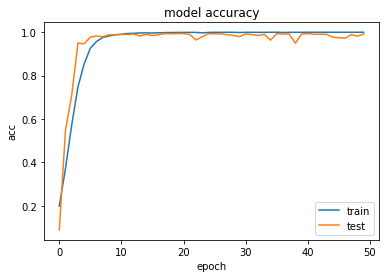

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
model.evaluate_generator(val_gene, verbose=1)

71/71 [==============================] - 19s 264ms/step


[0.6012899875640869, 0.9917429089546204]

In [0]:
pre = model.predict_generator(val_gene, verbose=1)

71/71 [==============================] - 19s 262ms/step


In [0]:
pred = []
for i in pre:
  pred.append(np.argmax(i))

In [0]:
pred[:40]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [0]:
val_gene.classes.astype(int)[:40]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
print(confusion_matrix(val_gene.classes.astype(int), pred))

[[484   2   0   2   0   1   1   0   2   5]
 [  0 449   0   0   0   0   0   0   3   1]
 [  0   0 461   0   0   0   0   0   1   1]
 [  0   0   0 469   0   0   0   0   0   0]
 [  0   0   0   2 460   0   1   0   2   0]
 [  0   0   0   0   1 459   0   0   0   2]
 [  0   1   1   0   0   0 462   0   0   1]
 [  0   0   0   0   0   0   0 399   1   0]
 [  0   0   0   0   0   0   1   0 378   3]
 [  0   0   0   0   0   0   0   0   2 423]]


In [0]:
activity_map = {'c0': 'Safe driving', 
                'c1': 'Texting - right', 
                'c2': 'Talking on the phone - right', 
                'c3': 'Texting - left', 
                'c4': 'Talking on the phone - left', 
                'c5': 'Operating the radio', 
                'c6': 'Drinking', 
                'c7': 'Reaching behind', 
                'c8': 'Hair and makeup', 
                'c9': 'Talking to passenger'}

In [0]:
model_name = 'DDS_Generators_9915.h5'
save_dir = '/content/drive/My Drive'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/DDS_Generators_9915.h5 


In [0]:
os.listdir('/content/test')[:30]

['img_42258.jpg',
 'img_85687.jpg',
 'img_47650.jpg',
 'img_8813.jpg',
 'img_79412.jpg',
 'img_46407.jpg',
 'img_81271.jpg',
 'img_35654.jpg',
 'img_32641.jpg',
 'img_95811.jpg',
 'img_20800.jpg',
 'img_41390.jpg',
 'img_88406.jpg',
 'img_56679.jpg',
 'img_69538.jpg',
 'img_99925.jpg',
 'img_14598.jpg',
 'img_84468.jpg',
 'img_94996.jpg',
 'img_84799.jpg',
 'img_34517.jpg',
 'img_20327.jpg',
 'img_26597.jpg',
 'img_3809.jpg',
 'img_15576.jpg',
 'img_2714.jpg',
 'img_59313.jpg',
 'img_64132.jpg',
 'img_41197.jpg',
 'img_45967.jpg']

In [0]:
shola = ['img_42258.jpg',
 'img_85687.jpg',
 'img_47650.jpg',
 'img_8813.jpg',
 'img_79412.jpg',
 'img_46407.jpg',
 'img_81271.jpg',
 'img_35654.jpg',
 'img_32641.jpg',
 'img_95811.jpg',
 'img_20800.jpg',
 'img_41390.jpg',
 'img_88406.jpg',
 'img_56679.jpg',
 'img_69538.jpg',
 'img_99925.jpg',
 'img_14598.jpg',
 'img_84468.jpg',
 'img_94996.jpg',
 'img_84799.jpg',
 'img_34517.jpg',
 'img_20327.jpg',
 'img_26597.jpg',
 'img_3809.jpg',
 'img_15576.jpg',
 'img_2714.jpg',
 'img_59313.jpg',
 'img_64132.jpg',
 'img_41197.jpg',
 'img_45967.jpg']

Drinking


(-0.5, 639.5, 479.5, -0.5)

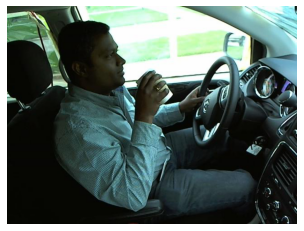

In [0]:
path = '/content/test/img_3292.jpg'
from keras.preprocessing import image
show = plt.imread(path)
test_image1 = image.load_img(path, target_size=(64, 64), color_mode='rgb')
test_image = image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis=0)
print(activity_map['c' + str(np.argmax(model.predict(test_image/255)))])
plt.imshow(show)
plt.axis("off")

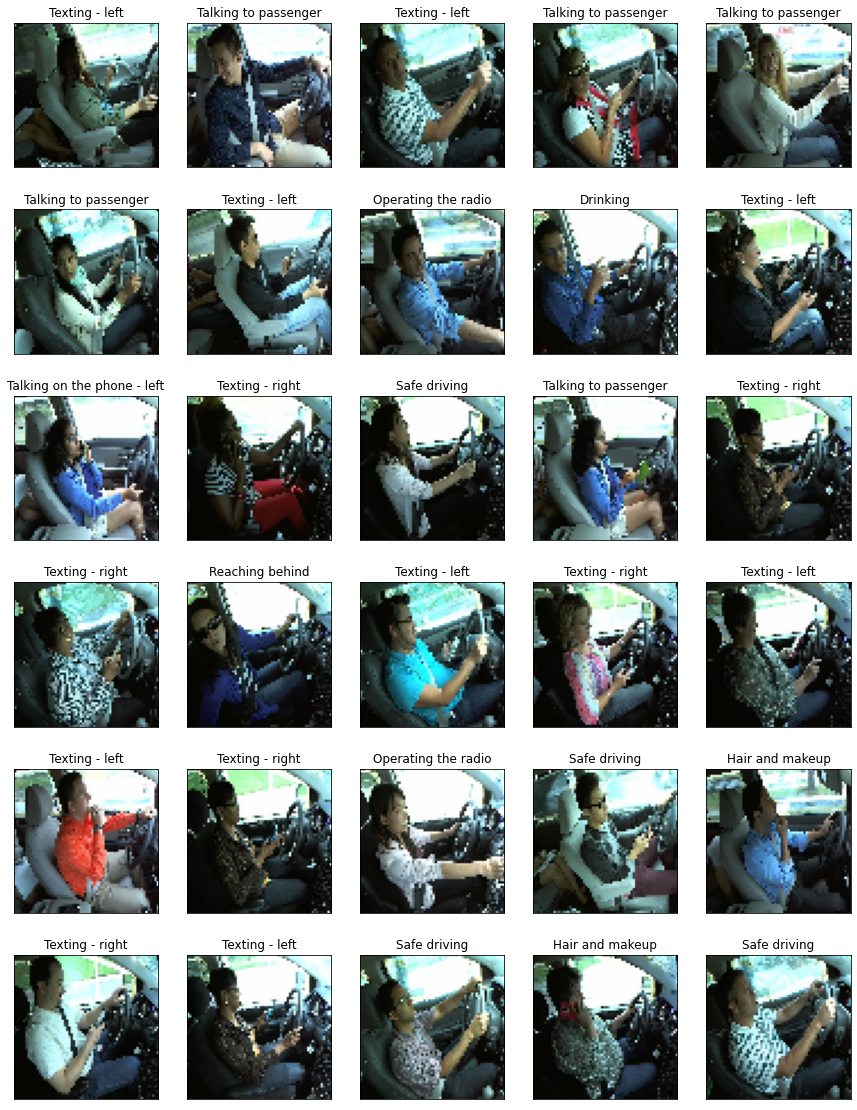

In [0]:
import math
n = 30
random_indices = np.random.permutation(n)
n_cols = 5
n_rows = math.ceil(n / n_cols)
imgr = []
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
for i in range(30):
    ax = axes.flat[i]
    path = '/content/test/' + str(shola[i])
    pla1 = image.load_img(path, target_size=(64, 64), color_mode='rgb')
    pla = image.img_to_array(pla1)
    pla = np.expand_dims(pla, axis=0)
    ax.imshow(pla1)
    ax.set_title(activity_map['c' + str(np.argmax(model.predict(pla/255)))])
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
  json_file.write(model_json)

#checkpoint = ModelCheckpoint('model_weights.h5', monitor= 'val_accuracy', save_weights_only=True, mode='max', verbose = 1)